# Basics

In this notebook, we introduce basic ways to read, show, explore and save images.


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
import os
%matplotlib nbagg

You can download the image used in this example here: [rabbit.jpg](./rabbit.jpg). The following code will work if the image is located in the same directory as the notebook itself. 

First, let's check if the file `rabbit.jpg` is in the current directory. 

In [10]:
files = os.listdir("./")
if "rabbit.jpg" in files:
    print("Ok, the file is in {0}".format(files))
else:
    print("The file is not in {0} , retry !".format(files))

Ok, the file is in ['rabbit.jpg', '.ipynb_checkpoints', '00_Basics.ipynb']


Now let's read it using **Python Image Library (aka PIL)**:

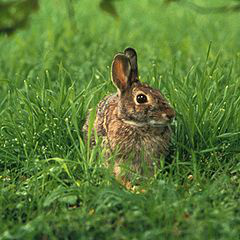

In [15]:
im = Image.open("rabbit.jpg")
im

## Numerical images

There are mainly two kinds of numerical images: 

* **Vectorial images** composed of basic geometric figures such as lines, polygons and so on. They are very efficient to store schemes or curves. They are generally stored as `.svg`, `.pfg` or `.eps` files. In this tutorial, we will not work on such images.
* **Raster images**, also call **bitmap** in which data is structures as matrix of **pixels**. Each pixel can contain from 1 to 4 values called **channels**. Images can then be sub classed by their number of channels: 
    * A single channel image is called grayscale, 
    * Most color images use 3 channels, one for red (R), one for green (G) and one for blue (B). They are called RGB images. 
    * Some image formats use a fourth channel called **alpha** corresponding to a transparency level. 